In [26]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [27]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [28]:
df.head()

,Unnamed: 0,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
specialisation_df=df.groupby('specialisation')

In [31]:
HR_ds=specialisation_df.salary.groups['Mkt&HR']
FIN_ds=specialisation_df.groups['Mkt&Fin']

In [32]:
HR_ds.shape,FIN_ds.shape

((95,), (120,))

In [43]:
sample_size = 95
HR_sampled = np.random.normal(HR_ds, sample_size)
FIN_sampled = np.random.normal(FIN_ds, sample_size)

0.9900672435760498 0.7030823826789856

 0.9894266128540039 0.48454028367996216


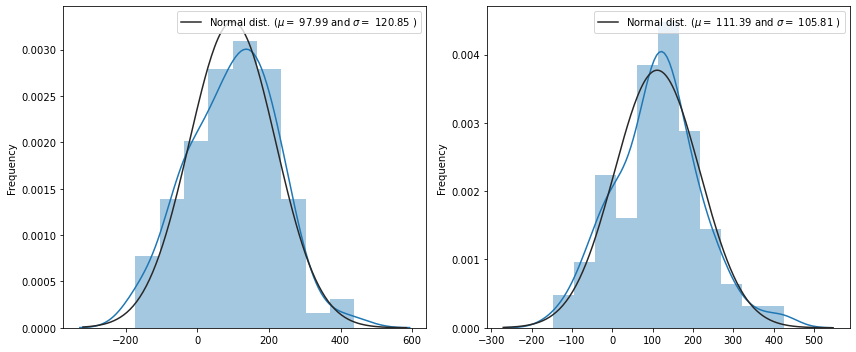

In [44]:
plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

#plt.subplots(figsize=(8,5))
sns.distplot(HR_sampled,fit=stats.norm,ax=ax1)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(HR_sampled)

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
ax2 = plt.subplot(1,2,2)
#plt.subplots(figsize=(8,5))
sns.distplot(FIN_sampled,fit=stats.norm,ax=ax2)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(FIN_sampled)
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.tight_layout()
W,p=stats.shapiro(HR_sampled)#data is not normally distributed as p value is less than 0.05
print(W,p)
W,p=stats.shapiro(FIN_sampled)#data is not normally distributed as p value is less than 0.05
print("\n",W,p)


In [45]:
stats.levene(HR_sampled,FIN_sampled)#variance are equal as p-value is greater than 0.05

LeveneResult(statistic=3.12002490682328, pvalue=0.07876798013673582)

In [46]:
# WELCH’S T-TEST ASSUMPTIONS (independent T-Test with unequal variance)
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2,equal_var=True)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions-Specialisation doesnot affect Salaries (fail to reject H0)')
    else:
        print('Different distributions-Specialisation affect Salaries (reject H0)')
    

In [47]:
compare_2_groups(FIN_sampled, HR_sampled, 0.05, sample_size)

Statistics=0.861, p=0.390
Same distributions-Specialisation doesnot affect Salaries (fail to reject H0)
